<a href="https://colab.research.google.com/github/costad3atwit/Alzheimer-s-Neuroimaging-Analysis/blob/main/Alzheimer's_Neuroimaging_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Individual Project - Alzheimer's Research**
####Data Science Fundamentals - Spring 2025
####Author: David Costa
####Date: 2/21/2025


##**Introduction**
---

###**Why this project was undertaken:**

This project was started as an academic exploration into data analysis and machine learning specifically with clinical data. The specific topic of Alzheimers Disease was chosen because of a personal connection to the disease.

---
###**Research Questions:**
1. Can a machine learning model be built to classify patients into different Alzheimer's stages based on neuropsychometric and clinical assessment data?
 -  **Classification**; Random Forest/Decision Tree; OASIS-4
2. Are there significant differences in the rate of cognitive decline between demographic groups?
 - **Clustering**; K-Means; OASIS-3 & OASIS-4
3. Which brain regions show the most significant shrinkage in patients with mild vs. moderate Alzheimer’s?
 -  **Feature Importance/Dimensionality Reduction**; Principal Component Analysis; OASIS-3
4. How well do different neuroimaging biomarkers correlate with clinical cognitive scores?
 - **Regression**; Linear Regression; OASIS-3 & OASIS-4

---
###**Purpose of research:**

The purpose of this research is to test the following hypothesis:

 *Alzheimer’s disease progression can be effectively predicted and characterized using a combination of neuropsychometric assessments, demographic factors, and neuroimaging biomarkers. Cognitive decline rates vary across demographic groups, and specific brain regions exhibit significant atrophy that correlates with disease severity and cognitive impairment.*


## **Selection of Data**
---


### **Source of Data**

The dataset(s) analyzed in this project originate from the *Open Access Series of Imaging Studies (OASIS)* procured by Washington University School of Medicine. The OASIS project is "*a project aimed at making neuroimaging data sets of the brain freely available to the scientific community*". There are 4 datasets in the project numbered OASIS-1 through OASIS-4. This analysis primarily utilized OASIS-3 and OASIS-4. OASIS 3 was collected from multiple ongoing projects at the Washington University in St. Louis Knight Alzheimer’s Disease Research Center over the course of 30 years and released publically in 2010.

---
### **Characteristics of Data:**

**The descriptions of the datasets are as follows:**


*   OASIS-1:
    * *Cross-sectional MRI Data in Young, Middle Aged, Nondemented and Demented Older Adults*
*   OASIS-2:
    * *Cross-sectional MRLongitudinal MRI Data in Nondemented and Demented Older AdultsI Data in Young, Middle Aged, Nondemented and Demented Older Adults*
*   OASIS-3:
    * *Longitudinal Multimodal Neuroimaging, Clinical, and Cognitive Dataset for Normal Aging and Alzheimer’s Disease*
*   OASIS-4:
    * *Clinical Cohort*


**Alzheimer's Disease Neuroimaging Initiative (ADNI)**: [ADNI Data Overview](https://adni.loni.usc.edu/data-samples/adni-data/) - Possible second set

---
### **Handling Missing or Required Data**

**Munging (Wrangling):**

Probably merging datasets (OASIS 3 & 4 if possible) filtering, modeling based on specific features, etc.

**Imputation:**

Likely none, the data is very well documented and organized. Also the University of Washington is a reputable source that would likely keep their publically available data in publically usable condition. If necessary will probably rely on something simple like mean/median/mode or KNN imputation.

**Feature Engineering:**

Most likely will need to normalize numerical data, convert binary categorical features into 1's and 0's, creating interaction terms between features. Likely won't need any dimensionality reduction techniques considering the datasets are already relatively small in number of predictors. Domain specific features calculated based on other features may be necessary, will need to conduct preliminary domain specific research to see if there is any necessary data which could be calculated in this manner.


##**Methods**
---

### **What models/methods were used in answering the research question?**

Picking a model which best answers the research question was a trial and error process. It included the following models:
1. Decision Trees
2. Random Forest
3. Linear Regression
4. Principal Component Analysis


From these different models necessary performance metrics like Cross Validation Mean Squared Error were gathered to compare the best performing models from each model type ultimately resulting in the decision for our model.For each model these performance metrics were evaluated to examine the model's predictive power for each of the research questions detailed above.

Also included in the analysis is some preliminary examination of the dataset to familiarize the reader with its contents - specifically the key features and what they mean in layman's terms. Additionally actual MRI images and some educational images are included simply as a reference for readers to familiarize themselves with where the quantitative data is derived from.

While the MRI scans are not directly worked with in this analysis, the *FreeSurfer* volumetric output computed by the researches at the Washington University School of Medicine is worked with. Freesurfer is a program used to measure the volume of different regions of the brain. Using this pre-processed structured data allows for the application of Machine Learning practices without the need for a deep neuroscience background.

## **Examining and Cleaning the Datasets**

Lets start by importing the necessary Python libraries and loading the data into the notebook.

In [ ]:
#Necessary imports/installs
!pip install nilearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nibabel as nib
import os
import ipywidgets as widgets
from IPython.display import display
from google.colab import files
from nilearn import plotting
from google.colab import drive
drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 30.4 MB/s eta 0:00:00
Mounted at /content/drive


---
Now we'll upload the Freesurfer output spreadsheet to Colab for analysis

---


In [ ]:
#Load the .csv files into Colab from drive
fs_file_path = "/content/drive/MyDrive/Alzheimers Proj/OASIS3_data_files/scans/FS-Freesurfer_output/resources/csv/files/OASIS3_Freesurfer_output.csv"

In [ ]:
#Load the .csv into a Pandas dataframe


fs_df = pd.read_csv(fs_file_path)
pd.set_option("display.max_columns", None)  # Show all columns
fs_df.head()

,Subject,MR_session,FS_FSDATA ID,Subject_accession,Freesurfer_accession,FS QC Status,version,IntraCranialVol,lhCortexVol,rhCortexVol,CortexVol,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,lhCorticalWhiteMatterVol,rhCorticalWhiteMatterVol,CorticalWhiteMatterVol,3rd-Ventricle_volume,4th-Ventricle_volume,5th-Ventricle_volume,Brain-Stem_volume,CC_Anterior_volume,CC_Central_volume,CC_Mid_Anterior_volume,CC_Mid_Posterior_volume,CC_Posterior_volume,CSF_volume,Left-Accumbens-area_volume,Left-Amygdala_volume,Left-Caudate_volume,Left-Cerebellum-White-Matter_volume,Left-Cerebellum-Cortex_volume,Left-choroid-plexus_volume,Left-Hippocampus_volume,Left-Inf-Lat-Vent_volume,Left-Lateral-Ventricle_volume,Left-non-WM-hypointensities_volume,Left-Pallidum_volume,Left-Putamen_volume,Left-Thalamus-Proper_volume,Left-VentralDC_volume,Left-vessel_volume,Left-WM-hypointensities_volume,Optic-Chiasm_volume,Right-Accumbens-area_volume,Right-Amygdala_volume,Right-Caudate_volume,Right-Cerebellum-White-Matter_volume,Right-Cerebellum-Cortex_volume,Right-choroid-plexus_volume,Right-Hippocampus_volume,Right-Inf-Lat-Vent_volume,Right-Lateral-Ventricle_volume,Right-non-WM-hypointensities_volume,Right-Pallidum_volume,Right-Putamen_volume,Right-Thalamus-Proper_volume,Right-VentralDC_volume,Right-vessel_volume,Right-WM-hypointensities_volume,WM-hypointensities_volume,non-WM-hypointensities_volume,L.Numvert,R.NumVert,L.SurfArea,R.SurfArea,lh_bankssts_volume,lh_bankssts_thickness,lh_caudalanteriorcingulate_volume,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_volume,lh_caudalmiddlefrontal_thickness,lh_cuneus_volume,lh_cuneus_thickness,lh_entorhinal_volume,lh_entorhinal_thickness,lh_frontalpole_volume,lh_frontalpole_thickness,lh_fusiform_volume,lh_fusiform_thickness,lh_inferiorparietal_volume,lh_inferiorparietal_thickness,lh_inferiortemporal_volume,lh_inferiortemporal_thickness,lh_insula_volume,lh_insula_thickness,lh_isthmuscingulate_volume,lh_isthmuscingulate_thickness,lh_lateraloccipital_volume,lh_lateraloccipital_thickness,lh_lateralorbitofrontal_volume,lh_lateralorbitofrontal_thickness,lh_lingual_volume,lh_lingual_thickness,lh_medialorbitofrontal_volume,lh_medialorbitofrontal_thickness,lh_middletemporal_volume,lh_middletemporal_thickness,lh_paracentral_volume,lh_paracentral_thickness,lh_parahippocampal_volume,lh_parahippocampal_thickness,lh_parsopercularis_volume,lh_parsopercularis_thickness,lh_parsorbitalis_volume,lh_parsorbitalis_thickness,lh_parstriangularis_volume,lh_parstriangularis_thickness,lh_pericalcarine_volume,lh_pericalcarine_thickness,lh_postcentral_volume,lh_postcentral_thickness,lh_posteriorcingulate_volume,lh_posteriorcingulate_thickness,lh_precentral_volume,lh_precentral_thickness,lh_precuneus_volume,lh_precuneus_thickness,lh_rostralanteriorcingulate_volume,lh_rostralanteriorcingulate_thickness,lh_rostralmiddlefrontal_volume,lh_rostralmiddlefrontal_thickness,lh_superiorfrontal_volume,lh_superiorfrontal_thickness,lh_superiorparietal_volume,lh_superiorparietal_thickness,lh_superiortemporal_volume,lh_superiortemporal_thickness,lh_supramarginal_volume,lh_supramarginal_thickness,lh_temporalpole_volume,lh_temporalpole_thickness,lh_transversetemporal_volume,lh_transversetemporal_thickness,rh_bankssts_volume,rh_bankssts_thickness,rh_caudalanteriorcingulate_volume,rh_caudalanteriorcingulate_thickness,rh_caudalmiddlefrontal_volume,rh_caudalmiddlefrontal_thickness,rh_cuneus_volume,rh_cuneus_thickness,rh_entorhinal_volume,rh_entorhinal_thickness,rh_frontalpole_volume,rh_frontalpole_thickness,rh_fusiform_volume,rh_fusiform_thickness,rh_inferiorparietal_volume,rh_inferiorparietal_thickness,rh_inferiortemporal_volume,rh_inferiortemporal_thickness,rh_insula_volume,rh_insula_thickness,rh_isthmuscingulate_volume,rh_isthmuscingulate_thickness,rh_lateraloccipital_volume,rh_lateraloccipital_thickness,rh_lateralorbitofrontal_volume,rh_lateralorbitofrontal_thickness,rh_lingual_volume,rh_lingual_thickness,rh_medialorbitofrontal_volume,rh_medialorbitofrontal

---
There's a lot of data here! Even in just the first 5 rows we have over 1000 values to sort through. The freesurfer output contains 203 columns, most measuring volumes for all the different regions of the brain for *each* scan. As you can see above, the Subject column (first column) is the same for all of the entries shown in this peek at the data. This means that each of these observations (rows) shows a different scan of the same subject typically with some duration of time between each. We can figure out how long that time is by taking a portion of the MR_session feature. At the end of each ID is a string d0000 where 0000 is the days since the subject's entry date into the study. A days from entry value of 0 means that this is the subject's first visit. Let's calculate and insert a column for day's since entry now.

---

In [ ]:
#Calculate the days since entry by slicing it out of each entry in MR_session
fs_df['Days_since_entry_temp'] = fs_df['MR_session'].apply(lambda x: int(x[-4:]))
#Insert a temporary duplicate to the calculated column in the place we want it in the dataframe
fs_df.insert(3, 'Days_since_entry', fs_df['Days_since_entry_temp'])
#Remove the calculated column
fs_df.drop(columns=['Days_since_entry_temp'],inplace=True)
#Rename the temporary duplicate
fs_df.head()

,Subject,MR_session,FS_FSDATA ID,Days_since_entry,Subject_accession,Freesurfer_accession,FS QC Status,version,IntraCranialVol,lhCortexVol,rhCortexVol,CortexVol,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,lhCorticalWhiteMatterVol,rhCorticalWhiteMatterVol,CorticalWhiteMatterVol,3rd-Ventricle_volume,4th-Ventricle_volume,5th-Ventricle_volume,Brain-Stem_volume,CC_Anterior_volume,CC_Central_volume,CC_Mid_Anterior_volume,CC_Mid_Posterior_volume,CC_Posterior_volume,CSF_volume,Left-Accumbens-area_volume,Left-Amygdala_volume,Left-Caudate_volume,Left-Cerebellum-White-Matter_volume,Left-Cerebellum-Cortex_volume,Left-choroid-plexus_volume,Left-Hippocampus_volume,Left-Inf-Lat-Vent_volume,Left-Lateral-Ventricle_volume,Left-non-WM-hypointensities_volume,Left-Pallidum_volume,Left-Putamen_volume,Left-Thalamus-Proper_volume,Left-VentralDC_volume,Left-vessel_volume,Left-WM-hypointensities_volume,Optic-Chiasm_volume,Right-Accumbens-area_volume,Right-Amygdala_volume,Right-Caudate_volume,Right-Cerebellum-White-Matter_volume,Right-Cerebellum-Cortex_volume,Right-choroid-plexus_volume,Right-Hippocampus_volume,Right-Inf-Lat-Vent_volume,Right-Lateral-Ventricle_volume,Right-non-WM-hypointensities_volume,Right-Pallidum_volume,Right-Putamen_volume,Right-Thalamus-Proper_volume,Right-VentralDC_volume,Right-vessel_volume,Right-WM-hypointensities_volume,WM-hypointensities_volume,non-WM-hypointensities_volume,L.Numvert,R.NumVert,L.SurfArea,R.SurfArea,lh_bankssts_volume,lh_bankssts_thickness,lh_caudalanteriorcingulate_volume,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_volume,lh_caudalmiddlefrontal_thickness,lh_cuneus_volume,lh_cuneus_thickness,lh_entorhinal_volume,lh_entorhinal_thickness,lh_frontalpole_volume,lh_frontalpole_thickness,lh_fusiform_volume,lh_fusiform_thickness,lh_inferiorparietal_volume,lh_inferiorparietal_thickness,lh_inferiortemporal_volume,lh_inferiortemporal_thickness,lh_insula_volume,lh_insula_thickness,lh_isthmuscingulate_volume,lh_isthmuscingulate_thickness,lh_lateraloccipital_volume,lh_lateraloccipital_thickness,lh_lateralorbitofrontal_volume,lh_lateralorbitofrontal_thickness,lh_lingual_volume,lh_lingual_thickness,lh_medialorbitofrontal_volume,lh_medialorbitofrontal_thickness,lh_middletemporal_volume,lh_middletemporal_thickness,lh_paracentral_volume,lh_paracentral_thickness,lh_parahippocampal_volume,lh_parahippocampal_thickness,lh_parsopercularis_volume,lh_parsopercularis_thickness,lh_parsorbitalis_volume,lh_parsorbitalis_thickness,lh_parstriangularis_volume,lh_parstriangularis_thickness,lh_pericalcarine_volume,lh_pericalcarine_thickness,lh_postcentral_volume,lh_postcentral_thickness,lh_posteriorcingulate_volume,lh_posteriorcingulate_thickness,lh_precentral_volume,lh_precentral_thickness,lh_precuneus_volume,lh_precuneus_thickness,lh_rostralanteriorcingulate_volume,lh_rostralanteriorcingulate_thickness,lh_rostralmiddlefrontal_volume,lh_rostralmiddlefrontal_thickness,lh_superiorfrontal_volume,lh_superiorfrontal_thickness,lh_superiorparietal_volume,lh_superiorparietal_thickness,lh_superiortemporal_volume,lh_superiortemporal_thickness,lh_supramarginal_volume,lh_supramarginal_thickness,lh_temporalpole_volume,lh_temporalpole_thickness,lh_transversetemporal_volume,lh_transversetemporal_thickness,rh_bankssts_volume,rh_bankssts_thickness,rh_caudalanteriorcingulate_volume,rh_caudalanteriorcingulate_thickness,rh_caudalmiddlefrontal_volume,rh_caudalmiddlefrontal_thickness,rh_cuneus_volume,rh_cuneus_thickness,rh_entorhinal_volume,rh_entorhinal_thickness,rh_frontalpole_volume,rh_frontalpole_thickness,rh_fusiform_volume,rh_fusiform_thickness,rh_inferiorparietal_volume,rh_inferiorparietal_thickness,rh_inferiortemporal_volume,rh_inferiortemporal_thickness,rh_insula_volume,rh_insula_thickness,rh_isthmuscingulate_volume,rh_isthmuscingulate_thickness,rh_lateraloccipital_volume,rh_lateraloccipital_thickness,rh_lateralorbitofrontal_volume,rh_lateralorbitofrontal_thickness,rh_lingual_volume,rh_lingual_thickness,rh_medialorbitofrontal_volume,rh_me

Let's join some demographic data to our dataframe now so we can further investigate the relationships between demographics and brain deterioration.

In [ ]:
#Upload some clinical data for OASIS-3
demo_file_path = "/content/drive/MyDrive/Alzheimers Proj/OASIS3_data_files/scans/demo-demographics/resources/csv/files/OASIS3_demographics.csv"

In [ ]:
demo_df = pd.read_csv(demo_file_path)
pd.set_option("display.max_columns", None)  # Show all columns

demo_df.head()

,OASISID,Subject_accession,AgeatEntry,AgeatDeath,GENDER,EDUC,SES,racecode,race,ETHNIC,AIAN,NHPI,ASIAN,AA,WHITE,daddem,momdem,HAND,APOE
0,OAS30001,NaN,65.1945,NaN,2,12.0,4.0,5,White,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,R,23.0
1,OAS30002,NaN,67.2521,76.9397,1,18.0,2.0,5,White,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,R,34.0
2,OAS30003,NaN,58.8137,NaN,2,18.0,1.0,5,White,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,R,33.0
3,OAS30004,NaN,55.1342,NaN,2,17.0,1.0,5,White,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,L,23.0
4,OAS30005,NaN,48.0630,NaN,2,16.0,3.0,2,ASIAN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,R,33.0


---
We can take a look at the spread of our data to ensure that it is a comprehensive sample

---

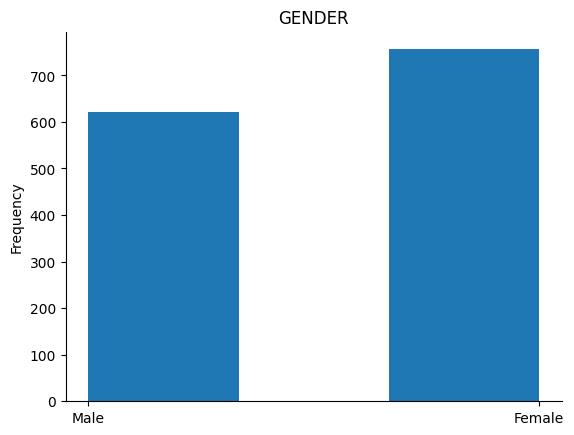

In [ ]:
# @title GENDER
demo_df['GENDER'].plot(kind='hist', bins=3, title='GENDER')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xticks([1.0, 2.0], ['Male', 'Female'])
plt.show()

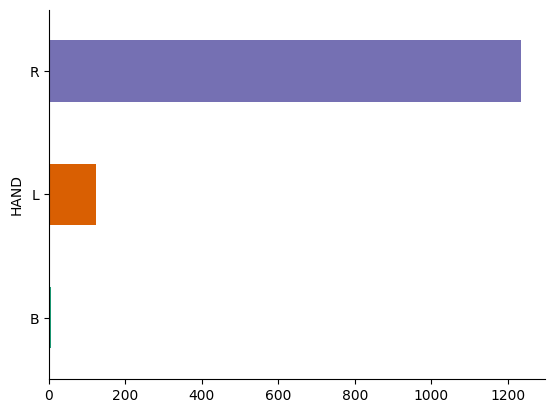

In [ ]:
# @title HAND
import seaborn as sns
demo_df.groupby('HAND').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

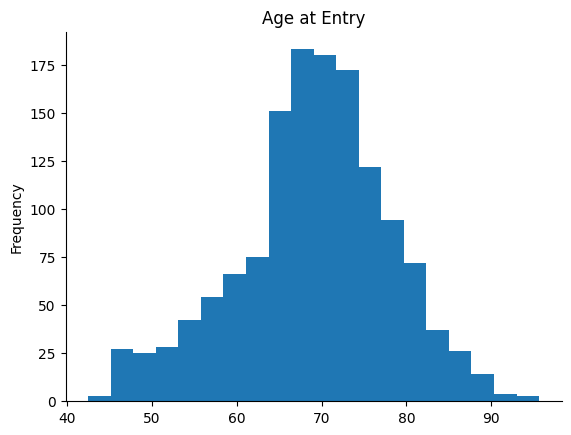

In [ ]:
# @title AgeatEntry
demo_df['AgeatEntry'].plot(kind='hist', bins=20, title='Age at Entry')
plt.gca().spines[['top', 'right',]].set_visible(False)

---
Now let's join these features to our main working dataframe

---

In [ ]:
#Subset the demographics dataframe
demo_df = demo_df[['OASISID','AgeatEntry','GENDER','HAND']]
demo_df.head()

,OASISID,AgeatEntry,GENDER,HAND
0,OAS30001,65.1945,2,R
1,OAS30002,67.2521,1,R
2,OAS30003,58.8137,2,R
3,OAS30004,55.1342,2,L
4,OAS30005,48.0630,2,R


In [ ]:
#Join demographics to freesurfer output
fs_df = pd.merge(fs_df, demo_df, left_on='Subject', right_on='OASISID', how='left')
fs_df.head()

,Subject,MR_session,FS_FSDATA ID,Days_since_entry,Subject_accession,Freesurfer_accession,FS QC Status,version,IntraCranialVol,lhCortexVol,rhCortexVol,CortexVol,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,lhCorticalWhiteMatterVol,rhCorticalWhiteMatterVol,CorticalWhiteMatterVol,3rd-Ventricle_volume,4th-Ventricle_volume,5th-Ventricle_volume,Brain-Stem_volume,CC_Anterior_volume,CC_Central_volume,CC_Mid_Anterior_volume,CC_Mid_Posterior_volume,CC_Posterior_volume,CSF_volume,Left-Accumbens-area_volume,Left-Amygdala_volume,Left-Caudate_volume,Left-Cerebellum-White-Matter_volume,Left-Cerebellum-Cortex_volume,Left-choroid-plexus_volume,Left-Hippocampus_volume,Left-Inf-Lat-Vent_volume,Left-Lateral-Ventricle_volume,Left-non-WM-hypointensities_volume,Left-Pallidum_volume,Left-Putamen_volume,Left-Thalamus-Proper_volume,Left-VentralDC_volume,Left-vessel_volume,Left-WM-hypointensities_volume,Optic-Chiasm_volume,Right-Accumbens-area_volume,Right-Amygdala_volume,Right-Caudate_volume,Right-Cerebellum-White-Matter_volume,Right-Cerebellum-Cortex_volume,Right-choroid-plexus_volume,Right-Hippocampus_volume,Right-Inf-Lat-Vent_volume,Right-Lateral-Ventricle_volume,Right-non-WM-hypointensities_volume,Right-Pallidum_volume,Right-Putamen_volume,Right-Thalamus-Proper_volume,Right-VentralDC_volume,Right-vessel_volume,Right-WM-hypointensities_volume,WM-hypointensities_volume,non-WM-hypointensities_volume,L.Numvert,R.NumVert,L.SurfArea,R.SurfArea,lh_bankssts_volume,lh_bankssts_thickness,lh_caudalanteriorcingulate_volume,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_volume,lh_caudalmiddlefrontal_thickness,lh_cuneus_volume,lh_cuneus_thickness,lh_entorhinal_volume,lh_entorhinal_thickness,lh_frontalpole_volume,lh_frontalpole_thickness,lh_fusiform_volume,lh_fusiform_thickness,lh_inferiorparietal_volume,lh_inferiorparietal_thickness,lh_inferiortemporal_volume,lh_inferiortemporal_thickness,lh_insula_volume,lh_insula_thickness,lh_isthmuscingulate_volume,lh_isthmuscingulate_thickness,lh_lateraloccipital_volume,lh_lateraloccipital_thickness,lh_lateralorbitofrontal_volume,lh_lateralorbitofrontal_thickness,lh_lingual_volume,lh_lingual_thickness,lh_medialorbitofrontal_volume,lh_medialorbitofrontal_thickness,lh_middletemporal_volume,lh_middletemporal_thickness,lh_paracentral_volume,lh_paracentral_thickness,lh_parahippocampal_volume,lh_parahippocampal_thickness,lh_parsopercularis_volume,lh_parsopercularis_thickness,lh_parsorbitalis_volume,lh_parsorbitalis_thickness,lh_parstriangularis_volume,lh_parstriangularis_thickness,lh_pericalcarine_volume,lh_pericalcarine_thickness,lh_postcentral_volume,lh_postcentral_thickness,lh_posteriorcingulate_volume,lh_posteriorcingulate_thickness,lh_precentral_volume,lh_precentral_thickness,lh_precuneus_volume,lh_precuneus_thickness,lh_rostralanteriorcingulate_volume,lh_rostralanteriorcingulate_thickness,lh_rostralmiddlefrontal_volume,lh_rostralmiddlefrontal_thickness,lh_superiorfrontal_volume,lh_superiorfrontal_thickness,lh_superiorparietal_volume,lh_superiorparietal_thickness,lh_superiortemporal_volume,lh_superiortemporal_thickness,lh_supramarginal_volume,lh_supramarginal_thickness,lh_temporalpole_volume,lh_temporalpole_thickness,lh_transversetemporal_volume,lh_transversetemporal_thickness,rh_bankssts_volume,rh_bankssts_thickness,rh_caudalanteriorcingulate_volume,rh_caudalanteriorcingulate_thickness,rh_caudalmiddlefrontal_volume,rh_caudalmiddlefrontal_thickness,rh_cuneus_volume,rh_cuneus_thickness,rh_entorhinal_volume,rh_entorhinal_thickness,rh_frontalpole_volume,rh_frontalpole_thickness,rh_fusiform_volume,rh_fusiform_thickness,rh_inferiorparietal_volume,rh_inferiorparietal_thickness,rh_inferiortemporal_volume,rh_inferiortemporal_thickness,rh_insula_volume,rh_insula_thickness,rh_isthmuscingulate_volume,rh_isthmuscingulate_thickness,rh_lateraloccipital_volume,rh_lateraloccipital_thickness,rh_lateralorbitofrontal_volume,rh_lateralorbitofrontal_thickness,rh_lingual_volume,rh_lingual_thickness,rh_medialorbitofrontal_volume,rh_me

---
We'll repeat this process with clinical, biomarker, and psychometric data from other spreadsheets contained in OASIS-3. A useful resource to sort through the extensive amounts of data to find what we're looking for is the OASIS-3 data dictionary which contains a table for each different dataset collected whether it be clinician judgements, CDR(Clinical Dementia Rating) related info, psychometrics, subject medical history, or other measurements. Below is a widget to navigate the dictionary. **Refer to these tables when column/feature names become ambiguous or confusing.**

---

In [ ]:
from IPython.display import display, clear_output

import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output



# Specify the path to your Excel file in Google Drive
file_path = '/content/drive/MyDrive/Alzheimers Proj/OASIS3_data_files/scans/dictionaries-Imaging_and_UDS_data_dictionaries/resources/pdf/files/OASIS3_Clinical and Psychometrics_dictionary.xlsx'  # Update with your actual file path

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Load the Excel file
excel_file = pd.ExcelFile(file_path)

# List the sheet names
sheet_selector = widgets.Dropdown(options=excel_file.sheet_names, description='Select Sheet:')
search_box = widgets.Text(placeholder="Search for a variable...", description="Search:")

# Display widgets
display(sheet_selector, search_box)

# Function to display the selected sheet
def display_sheet(change):
    clear_output(wait=True)  # Clear previous output
    display(sheet_selector, search_box)  # Redisplay widgets

    sheet_name = sheet_selector.value
    df = excel_file.parse(sheet_name)

    # Ensure there is a first column to search in
    if df.shape[1] == 0:
        display("The selected sheet is empty.")
        return

    display(df)  # Show full dataset initially

    # Function to filter rows based on search in the first column
    def filter_rows(change):
        query = search_box.value.lower()
        if query:
            filtered_df = df[df.iloc[:, 0].astype(str).str.lower().str.contains(query, na=False)]
        else:
            filtered_df = df  # If search is empty, show full table

        clear_output(wait=True)
        display(sheet_selector, search_box)
        display(filtered_df)

    # Attach event listener to search box
    search_box.observe(filter_rows, names='value')

# Observe changes in the dropdown to display the selected sheet
sheet_selector.observe(display_sheet, names='value')

Dropdown(description='Select Sheet:', options=('demographics', 'UDSa1 v2 v3', 'UDSa2 v2 v3', 'UDSa3 v2', 'UDSa…

Text(value='', description='Search:', placeholder='Search for a variable...')

---
Some helpful context can be provided by the actual MRI Images so we can see the shrinkage of different key regions of the brain. While AD affects the brain generally, the areas at highest risk of degeneration are the hippocampus (located in the temporal lobe handles memories), frontal lobe, temporal lobe, and the parietal lobe. Let's look at OAS30001's scans now.

---

In [ ]:

files.upload()

print("Files in /content/:", os.listdir("/content/"))
file_path = "/content/mpr-1.nifti.img"

if os.path.exists(file_path):
    print("File exists!")
else:
    print("File NOT found. Check the filename carefully.")

In [ ]:

# Define the file path (update with your actual filename)
nifti_file = "/content/mpr-1.nifti.img"

# Load the NIfTI image
img = nib.load(nifti_file)

# Display basic image information
print(img)

# Plot the anatomical view
plotting.plot_anat(nifti_file, title="Testing upload of NiFti Images")
plotting.show()

In [ ]:
# Get image data as a NumPy array
img_data = img.get_fdata()

# Show a middle slice
slice_index = img_data.shape[2] // 2  # Middle slice along the Z-axis
plt.imshow(img_data[:, :, slice_index], cmap="gray")
plt.title(f"Slice {slice_index}")
plt.axis("off")
plt.show()

*An overview of the primary functions of each lobe in the brain*
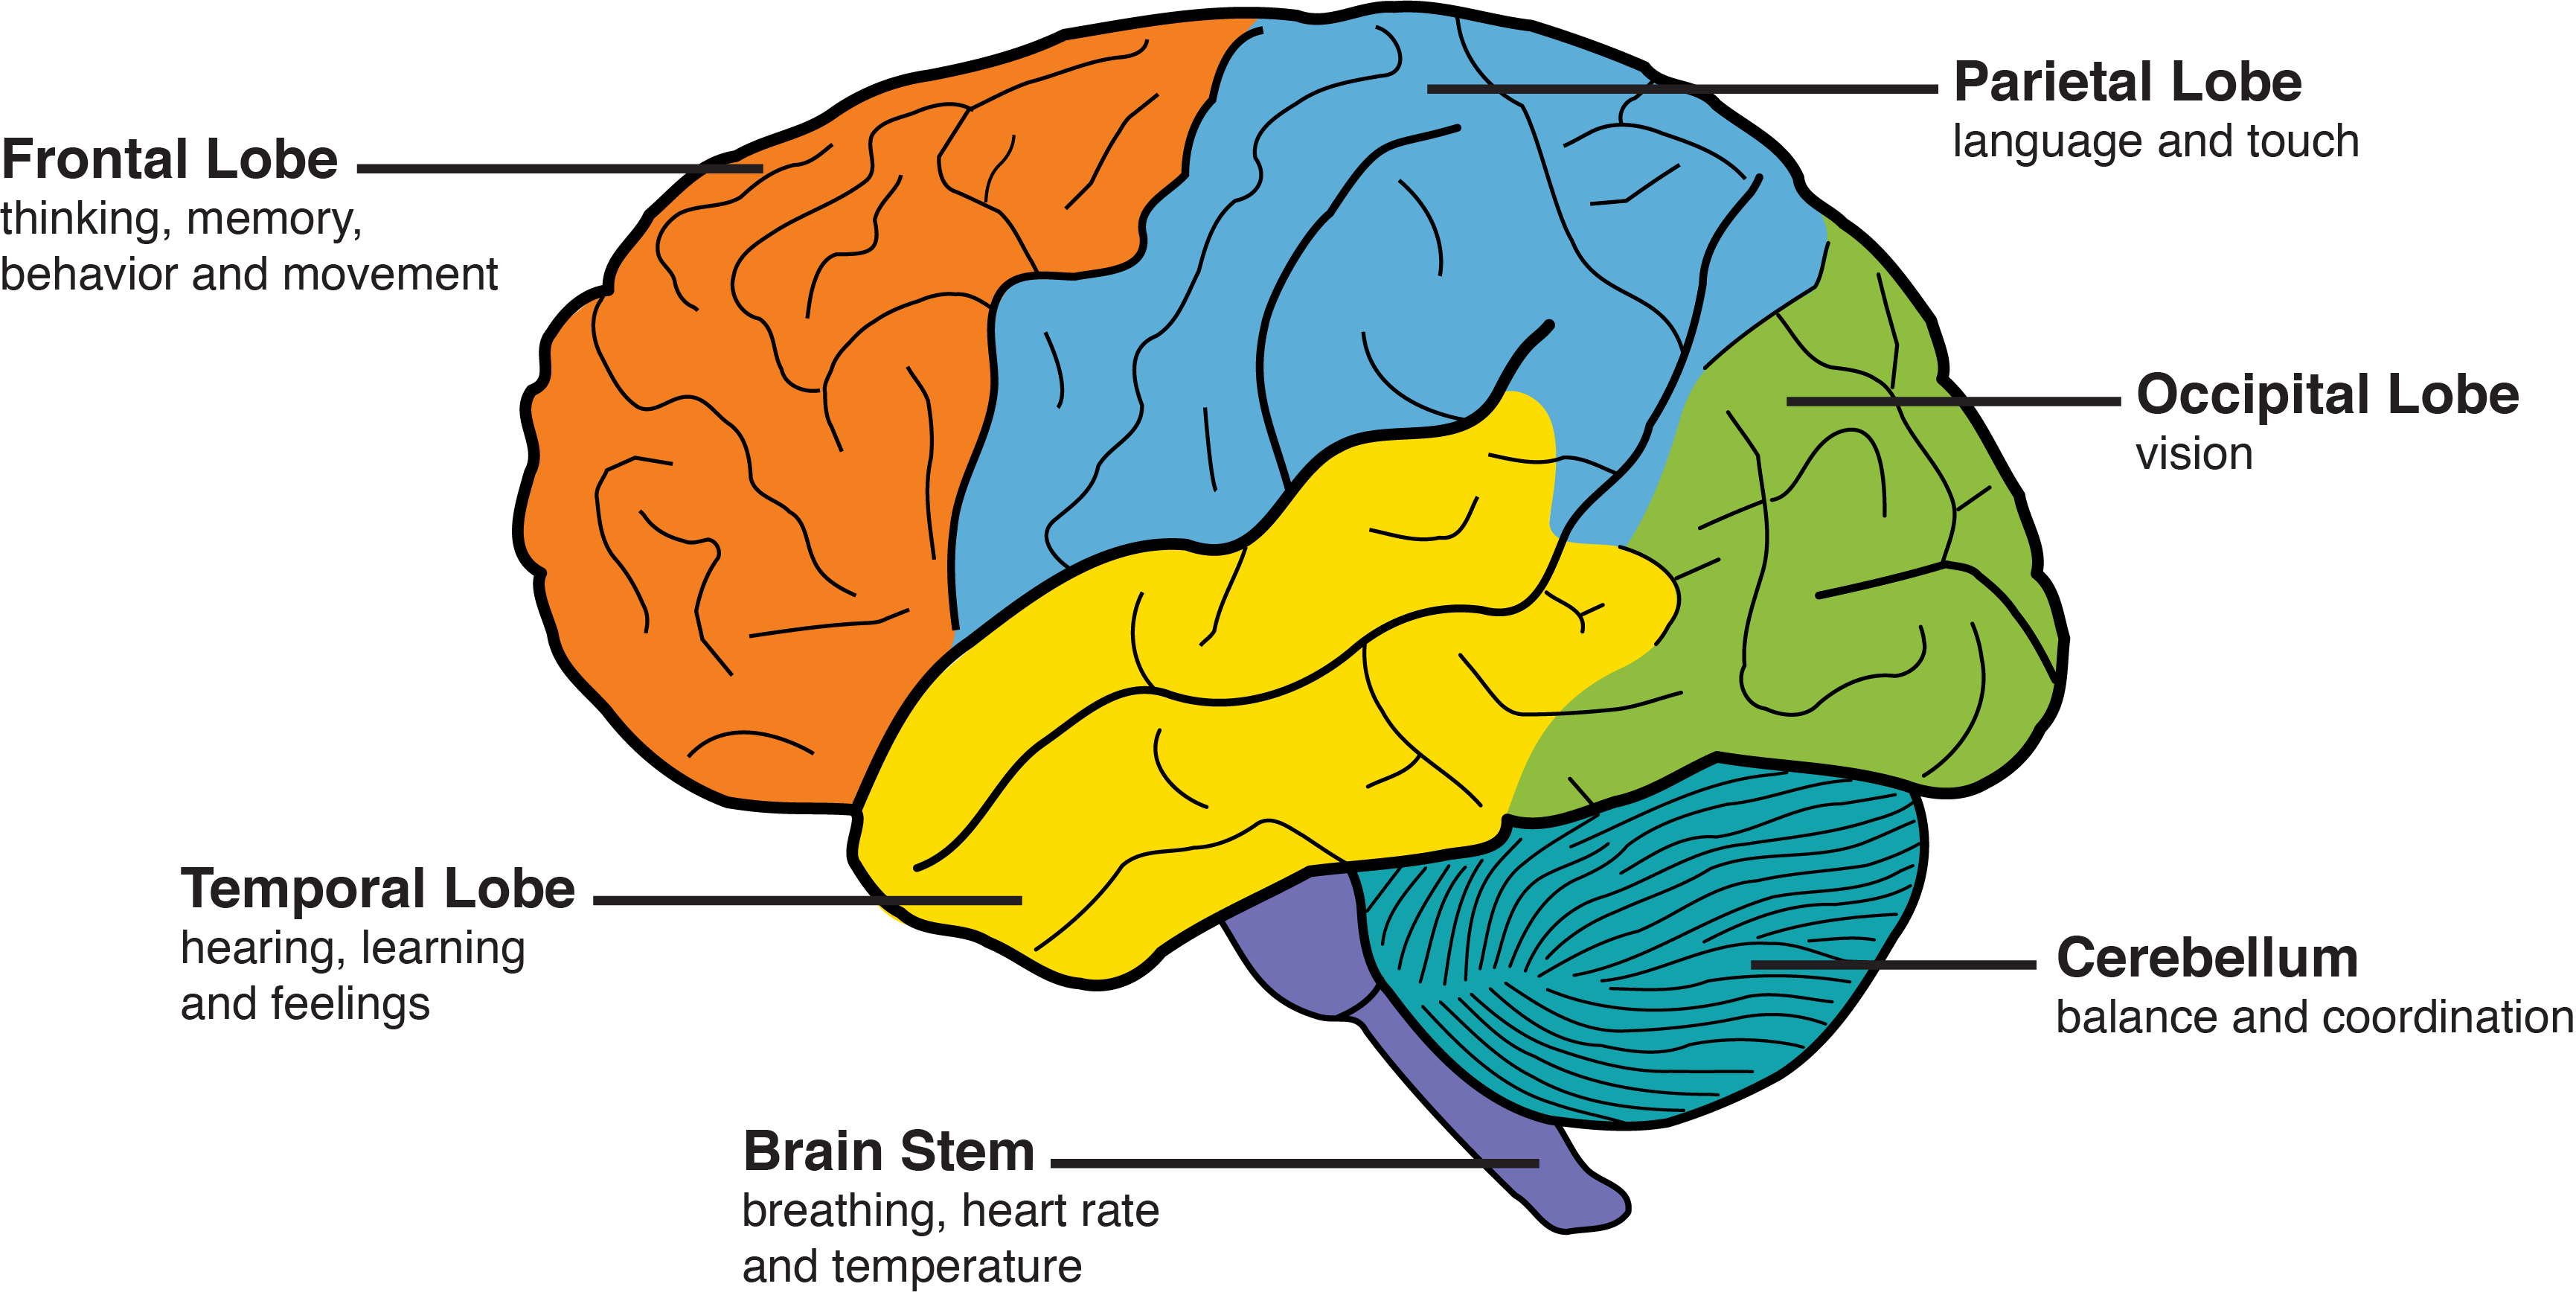

Source: https://memory.ucsf.edu/caregiving-support/behavior-personality-changes

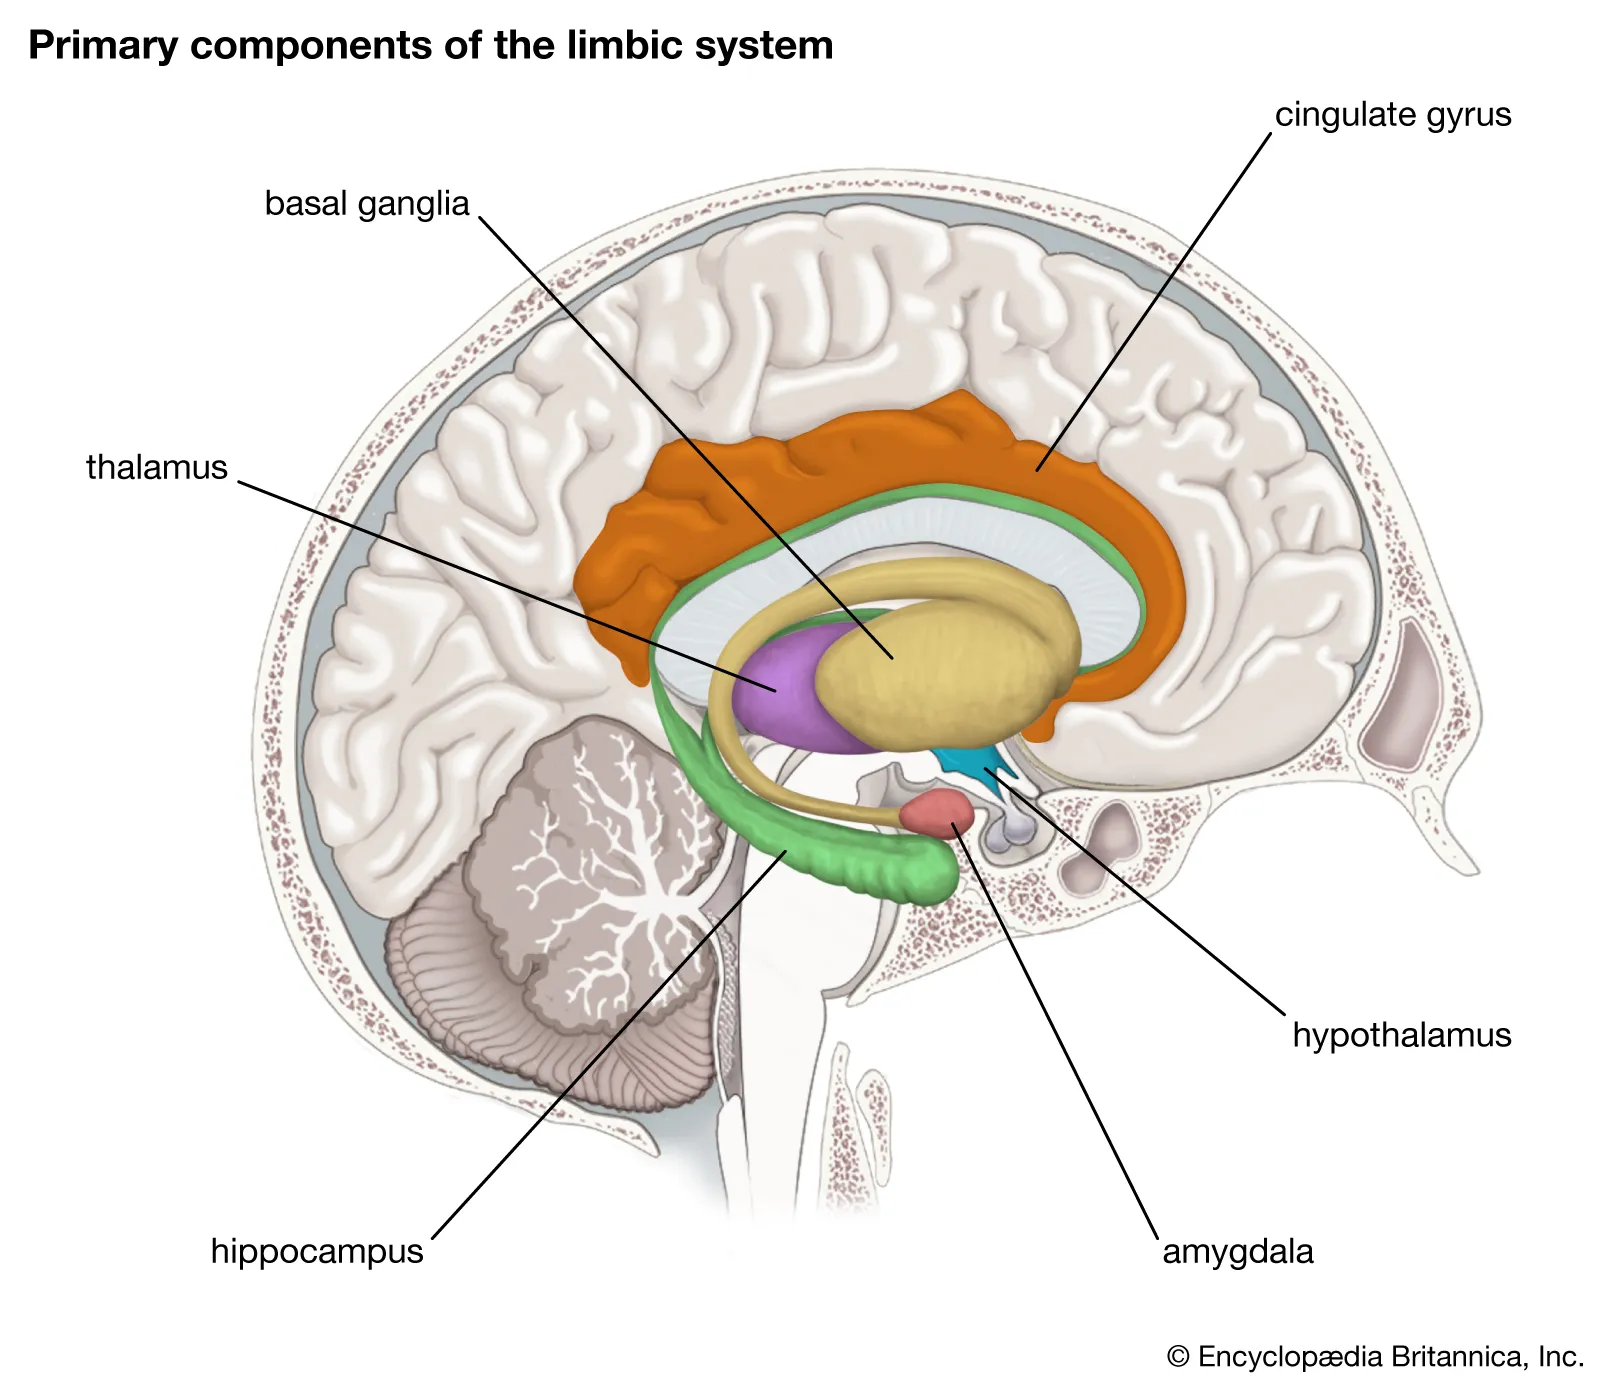

Source: https://www.britannica.com/science/limbic-system

## **Building a model**
---
Now that we've collected all the important data into one table, we need to narrow down all the possible predictors to what is *acutally* important for each model. We'll do this using a combination of domain knowledge and machine learning techniques.

Firstly, we'll exclude features based on background/domain research.

Looking at the extensive list of brain subregions that OASIS-3 measures below helps us decide which features we can rule out for this analysis using background knowledge (without any ML techniques). Those include any subregion falling under the following major regions:
 - Ventricals and CSF (Cerebrospinal Fluid)
 - Brainstem
 - Cerebellum
 - Occipital Lobe (occipital lobe degeneration typically occurs in late stage AD which is not extensively measured in OASIS-3)

Sources: https://alzheimer.ca/en/about-dementia/what-alzheimers-disease/how-alzheimers-disease-changes-brain

https://www.alz.org/alzheimers-dementia/what-is-dementia/types-of-dementia/posterior-cortical-atrophy?utm_source=chatgpt.com

Let's remove them from the dataset now.

| Measured Region                               | Non-Variable Name                              | Major Lobe/Region              |
|-----------------------------------------------|------------------------------------------------|--------------------------------|
| lh_CortexVol                                  | Left-hemisphere Cortex Volume                       | Frontal Lobe                   |
| rh_CortexVol                                  | Right-hemisphere Cortex Volume                      | Frontal Lobe                   |
| CortexVol                                     | Total Cortex Volume                           | Frontal Lobe                   |
| lh_caudalmiddlefrontal_volume                 | Left Caudal Middle Frontal Volume            | Frontal Lobe                   |
| lh_caudalmiddlefrontal_thickness              | Left Caudal Middle Frontal Thickness         | Frontal Lobe                   |
| lh_frontalpole_volume                         | Left Frontal Pole Volume                     | Frontal Lobe                   |
| lh_frontalpole_thickness                      | Left Frontal Pole Thickness                  | Frontal Lobe                   |
| lh_lateralorbitofrontal_volume                | Left Lateral Orbitofrontal Volume           | Frontal Lobe                   |
| lh_lateralorbitofrontal_thickness             | Left Lateral Orbitofrontal Thickness        | Frontal Lobe                   |
| lh_medialorbitofrontal_volume                 | Left Medial Orbitofrontal Volume            | Frontal Lobe                   |
| lh_medialorbitofrontal_thickness              | Left Medial Orbitofrontal Thickness         | Frontal Lobe                   |
| lh_parsopercularis_volume                     | Left Pars Opercularis Volume                 | Frontal Lobe                   |
| lh_parsopercularis_thickness                  | Left Pars Opercularis Thickness              | Frontal Lobe                   |
| lh_parsorbitalis_volume                       | Left Pars Orbitalis Volume                   | Frontal Lobe                   |
| lh_parsorbitalis_thickness                    | Left Pars Orbitalis Thickness                | Frontal Lobe                   |
| lh_parstriangularis_volume                    | Left Pars Triangularis Volume                | Frontal Lobe                   |
| lh_parstriangularis_thickness                 | Left Pars Triangularis Thickness             | Frontal Lobe                   |
| lh_postcentral_volume                          | Left Postcentral Volume                       | Parietal Lobe                  |
| lh_postcentral_thickness                       | Left Postcentral Thickness                    | Parietal Lobe                  |
| lh_inferiorparietal_volume                   | Left Inferior Parietal Volume                | Parietal Lobe                  |
| lh_inferiorparietal_thickness                | Left Inferior Parietal Thickness             | Parietal Lobe                  |
| lh_precuneus_volume                            | Left Precuneus Volume                        | Parietal Lobe                  |
| lh_precuneus_thickness                         | Left Precuneus Thickness                     | Parietal Lobe                  |
| lh_superiorparietal_volume                    | Left Superior Parietal Volume                | Parietal Lobe                  |
| lh_superiorparietal_thickness                 | Left Superior Parietal Thickness             | Parietal Lobe                  |
| lh_cuneus_volume                              | Left Cuneus Volume                           | Occipital Lobe                 |
| lh_cuneus_thickness                           | Left Cuneus Thickness                        | Occipital Lobe                 |
| lh_lingual_volume                             | Left Lingual Volume                          | Occipital Lobe                 |
| lh_lingual_thickness                          | Left Lingual Thickness                       | Occipital Lobe                 |
| lh_lateraloccipital_volume                    | Left Lateral Occipital Volume                | Occipital Lobe                 |
| lh_lateraloccipital_thickness                 | Left Lateral Occipital Thickness             | Occipital Lobe                 |
| lh_pericalcarine_volume                       | Left Pericalcarine Volume                    | Occipital Lobe                 |
| lh_pericalcarine_thickness                    | Left Pericalcarine Thickness                 | Occipital Lobe                 |
| lh_fusiform_volume                            | Left Fusiform Volume                         | Temporal Lobe                  |
| lh_fusiform_thickness                         | Left Fusiform Thickness                      | Temporal Lobe                  |
| lh_inferiortemporal_volume                    | Left Inferior Temporal Volume                 | Temporal Lobe                  |
| lh_inferiortemporal_thickness                 | Left Inferior Temporal Thickness              | Temporal Lobe                  |
| lh_middletemporal_volume                      | Left Middle Temporal Volume                  | Temporal Lobe                  |
| lh_middletemporal_thickness                   | Left Middle Temporal Thickness               | Temporal Lobe                  |
| right_CortexVol                               | Right-hand Cortex Volume                     | Frontal Lobe                   |
| right_lateralorbitofrontal_volume             | Right Lateral Orbitofrontal Volume          | Frontal Lobe                   |
| right_lateralorbitofrontal_thickness          | Right Lateral Orbitofrontal Thickness       | Frontal Lobe                   |
| right_medialorbitofrontal_volume              | Right Medial Orbitofrontal Volume           | Frontal Lobe                   |
| right_medialorbitofrontal_thickness           | Right Medial Orbitofrontal Thickness        | Frontal Lobe                   |
| right_parsopercularis_volume                  | Right Pars Opercularis Volume                | Frontal Lobe                   |
| right_parsopercularis_thickness               | Right Pars Opercularis Thickness             | Frontal Lobe                   |
| right_parsorbitalis_volume                    | Right Pars Orbitalis Volume                  | Frontal Lobe                   |
| right_parsorbitalis_thickness                 | Right Pars Orbitalis Thickness               | Frontal Lobe                   |
| right_parstriangularis_volume                 | Right Pars Triangularis Volume               | Frontal Lobe                   |
| right_parstriangularis_thickness              | Right Pars Triangularis Thickness            | Frontal Lobe                   |
| right_postcentral_volume                       | Right Postcentral Volume                      | Parietal Lobe                  |
| right_postcentral_thickness                    | Right Postcentral Thickness                   | Parietal Lobe                  |
| right_inferiorparietal_volume                 | Right Inferior Parietal Volume               | Parietal Lobe                  |
| right_inferiorparietal_thickness              | Right Inferior Parietal Thickness            | Parietal Lobe                  |
| right_precuneus_volume                         | Right Precuneus Volume                       | Parietal Lobe                  |
| right_precuneus_thickness                      | Right Precuneus Thickness                    | Parietal Lobe                  |
| right_superiorparietal_volume                 | Right Superior Parietal Volume               | Parietal Lobe                  |
| right_superiorparietal_thickness              | Right Superior Parietal Thickness            | Parietal Lobe                  |
| right_cuneus_volume                           | Right Cuneus Volume                          | Occipital Lobe                 |
| right_cuneus_thickness                        | Right Cuneus Thickness                       | Occipital Lobe                 |
| right_lingual_volume                          | Right Lingual Volume                         | Occipital Lobe                 |
| right_lingual_thickness                       | Right Lingual Thickness                      | Occipital Lobe                 |
| right_lateraloccipital_volume                 | Right Lateral Occipital Volume               | Occipital Lobe                 |
| right_lateraloccipital_thickness              | Right Lateral Occipital Thickness            | Occipital Lobe                 |
| right_pericalcarine_volume                    | Right Pericalcarine Volume                   | Occipital Lobe                 |
| right_pericalcarine_thickness                 | Right Pericalcarine Thickness                | Occipital Lobe                 |
| right_fusiform_volume                         | Right Fusiform Volume                        | Temporal Lobe                  |
| right_fusiform_thickness                      | Right Fusiform Thickness                     | Temporal Lobe                  |
| right_inferiortemporal_volume                 | Right Inferior Temporal Volume               | Temporal Lobe                  |
| right_inferiortemporal_thickness              | Right Inferior Temporal Thickness            | Temporal Lobe                  |
| right_middletemporal_volume                   | Right Middle Temporal Volume                 | Temporal Lobe                  |
| right_middletemporal_thickness                | Right Middle Temporal Thickness              | Temporal Lobe                  |
| IntraCranialVol                              | Intracranial Volume                           | Total and Additional Volumes   |
| SubCortGrayVol                               | Subcortical Gray Matter Volume                | Total and Additional Volumes   |
| TotalGrayVol                                  | Total Gray Matter Volume                      | Total and Additional Volumes   |
| SupraTentorialVol                             | Supratentorial Volume                         | Total and Additional Volumes   |
| 3rd-Ventricle_volume                          | Third Ventricle Volume                        | Ventricles and CSF            |
| 4th-Ventricle_volume                          | Fourth Ventricle Volume                       | Ventricles and CSF            |
| 5th-Ventricle_volume                          | Fifth Ventricle Volume                        | Ventricles and CSF            |
| Brain-Stem_volume                             | Brain Stem Volume                             | Brainstem                      |
| CC_Anterior_volume                            | Corpus Callosum Anterior Volume              | Corpus Callosum                |
| CC_Central_volume                             | Corpus Callosum Central Volume                | Corpus Callosum                |
| CC_Mid_Anterior_volume                        | Corpus Callosum Mid-Anterior Volume           | Corpus Callosum                |
| CC_Mid_Posterior_volume                       | Corpus Callosum Mid-Posterior Volume          | Corpus Callosum                |
| CC_Posterior_volume                           | Corpus Callosum Posterior Volume              | Corpus Callosum                |
| CSF_volume                                    | Cerebrospinal Fluid Volume                    | Ventricles and CSF            |
| Left-Accumbens-area_volume                    | Left Accumbens Area Volume                    | Limbic System                  |
| Left-Amygdala_volume                          | Left Amygdala Volume                          | Limbic System                  |
| Left-Caudate_volume                           | Left Caudate Volume                           | Subcortical Structures         |
| Left-Cerebellum-White-Matter_volume           | Left Cerebellum White Matter Volume           | Cerebellum                     |
| Left-Cerebellum-Cortex_volume                 | Left Cerebellum Cortex Volume                 | Cerebellum                     |
| Left-choroid-plexus_volume                    | Left Choroid Plexus Volume                    | Ventricles and CSF            |
| Left-Hippocampus_volume                       | Left Hippocampus Volume                       | Limbic System                  |
| Left-Inf-Lat-Vent_volume                      | Left Inferior Lateral Ventricle Volume       | Ventricles and CSF            |
| Left-Lateral-Ventricle_volume                 | Left Lateral Ventricle Volume                 | Ventricles and CSF            |
| Left-non-WM-hypointensities_volume            | Left Non-White Matter Hypointensities Volume  | Total and Additional Volumes   |
| Left-Pallidum_volume                          | Left Pallidum Volume                          | Subcortical Structures         |
| Left-Putamen_volume                           | Left Putamen Volume                           | Subcortical Structures         |
| Left-Thalamus-Proper_volume                   | Left Thalamus Proper Volume                   | Subcortical Structures         |
| Left-VentralDC_volume                         | Left Ventral Dorsal Cortex Volume            | Subcortical Structures         |
| Left-vessel_volume                            | Left Vessel Volume                            | Total and Additional Volumes   |
| Left-WM-hypointensities_volume                | Left White Matter Hypointensities Volume      | Total and Additional Volumes   |
| Optic-Chiasm_volume                           | Optic Chiasm Volume                          | Brainstem                      |
| Right-Accumbens-area_volume                   | Right Accumbens Area Volume                   | Limbic System                  |
| Right-Amygdala_volume                         | Right Amygdala Volume                         | Limbic System                  |
| Right-Caudate_volume                          | Right Caudate Volume                          | Subcortical Structures         |
| Right-Cerebellum-White-Matter_volume          | Right Cerebellum White Matter Volume          | Cerebellum                     |
| Right-Cerebellum-Cortex_volume                | Right Cerebellum Cortex Volume                | Cerebellum                     |
| Right-choroid-plexus_volume                   | Right Choroid Plexus Volume                   |


##**Results**
---

What answer was found to the research question; what did the study find? Any visualizations?

##**Discussion**
---

What might the answer imply and why does it matter? How does it fit in with what other researchers have found? What are the perspectives for future research?

##**Coding & Reference**
---

Clear citation at end of the report. ipynb file with clear comments and datafile.

https://www.nitrc.org/projects/oasis3/